# Netflix VS Disney +

## Limpieza de datos

In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from wordcloud import WordCloud



# Ruta del archivo Disney Plus
file_path_disney = 'disney_plus_titles.csv'

# Intentar leer el archivo CSV de Disney Plus usando diferentes codificaciones
try:
    df1 = pd.read_csv(file_path_disney, encoding='latin1')
    print("Disney Plus data imported successfully with encoding 'latin1'.")
except UnicodeDecodeError:
    try:
        df1 = pd.read_csv(file_path_disney, encoding='iso-8859-1')
        print("Disney Plus data imported successfully with encoding 'iso-8859-1'.")
    except UnicodeDecodeError:
        df1 = pd.read_csv(file_path_disney, encoding='cp1252')
        print("Disney Plus data imported successfully with encoding 'cp1252'.")

# Muestra las primeras filas del DataFrame para verificar que se ha importado correctamente
print("Disney Plus Data (df1):")
print(df1.head())





Disney Plus data imported successfully with encoding 'latin1'.
Disney Plus Data (df1):
  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                                NaN   

                                                cast        country  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN...            NaN   
1           Jim Varney, Noelle Parker, Douglas Seale            NaN   
2  Raymond Albert Romano, 

In [41]:
# Ruta del archivo Netflix
file_path_netflix = 'netflix_titles.csv'

# Intentar leer el archivo CSV de Netflix usando diferentes codificaciones
try:
    df2 = pd.read_csv(file_path_netflix, encoding='latin1')
    print("Netflix data imported successfully with encoding 'latin1'.")
except UnicodeDecodeError:
    try:
        df2 = pd.read_csv(file_path_netflix, encoding='iso-8859-1')
        print("Netflix data imported successfully with encoding 'iso-8859-1'.")
    except UnicodeDecodeError:
        df2 = pd.read_csv(file_path_netflix, encoding='cp1252')
        print("Netflix data imported successfully with encoding 'cp1252'.")

# Muestra las primeras filas del DataFrame para verificar que se ha importado correctamente
print("Netflix Data (df2):")
print(df2.head())

Netflix data imported successfully with encoding 'latin1'.
Netflix Data (df2):
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  ... Unnamed: 16  \
0  September 25, 2021          2020  PG-13     

Revisamos las columnas de los dataframes para comenzar con la limpieza necesaria antes de concatenar.

In [42]:
# Visualizar las columnas de Disney y Netflix
print(df1.columns)
print(df2.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')


In [43]:
# Eliminar columnas innecesarias
df2 = df2.drop(columns=['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'])


In [59]:
# Agregar una columna nueva a df1 que se llame plataforma para saber en que plataforma se encuentra la serie
df1['plataforma'] = 'disney'
df2['plataforma'] = 'netflix'

Unimos las dos bases de datos con el método de concatenar, ya que tienen las mismas columnas

In [60]:
# Unimos las dos bases de datos
df = pd.concat([df1, df2], ignore_index=True)

Quitamos las columnas que creemos que no aportarán a nuestro análisis.

In [61]:
# Eliminamos columna country
df = df.drop(columns=['country'])

Continuamos con la limpieza del código, comprobando los duplicados, tipos de datos de cada columna y gestionando los valores nulos y outliers.

In [50]:
# Valores duplicados
df.duplicated().sum()

0

In [51]:
# visualizamos tipos de datos en df
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
plataforma      object
dtype: object

In [64]:
# Eliminamos las filas que tengan mas del 50% de valores vacios
df = df.dropna(thresh=len(df)*0.5, axis=1)

In [65]:
# Gestionamos los valores nulos para evitar errores
df['director'] = df['director'].fillna('Desconocido')
df['cast'] = df['cast'].fillna('No Disponible')
df['rating'] = df['rating'].fillna('Desconocido')
#Eliminamos las fechas con espacios adicionales (en un error aparecía " August 4, 2017")
df['date_added'] = df['date_added'].str.strip()
# Convertimos la columna 'date_added' a formato de fecha, sin especificar el formato de origen(puede haber varios)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [66]:
# Eliminamos de la columna rating los outliers.
df = df[~df['rating'].isin(['74 min', '84 min', '66 min', 'A', 'NC-17', 'UR'])]

In [67]:
# Visualizar valores de calificacion
df['rating'].value_counts()

rating
TV-MA          3208
TV-14          2239
TV-PG          1164
R               799
PG-13           556
TV-G            538
PG              523
TV-Y7           465
TV-Y            357
G               294
NR               80
TV-Y7-FV         19
Desconocido       7
Name: count, dtype: int64

Traducimos los valores de rating a unas categorías por edad. Para que la data sea más comprensible.

In [68]:
def categorize_rating(rating):
    if rating in ['TV-Y', 'TV-G', 'G']:
        return 'Para todas las edades / niños pequeños'
    elif rating in ['TV-Y7', 'TV-Y7-FV', 'PG', 'TV-PG']:
        return 'Para niños mayores'
    elif rating in ['PG-13', 'TV-14']:
        return 'Para adolescentes'
    elif rating in ['R', 'TV-MA', 'NC-17']:
        return 'Para adultos'
    else:
        return 'Desconocido'
    

df['age_category'] = df['rating'].apply(categorize_rating)

## EDA

Revisamos las características del DataFrame.

In [69]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

  show_id     type                                             title  \
0      s1    Movie  Duck the Halls: A Mickey Mouse Christmas Special   
1      s2    Movie                            Ernest Saves Christmas   
2      s3    Movie                      Ice Age: A Mammoth Christmas   
3      s4    Movie                        The Queen Family Singalong   
4      s5  TV Show                             The Beatles: Get Back   

                            director  \
0  Alonso Ramirez Ramos, Dave Wasson   
1                        John Cherry   
2                       Karen Disher   
3                    Hamish Hamilton   
4                        Desconocido   

                                                cast date_added  release_year  \
0  Chris Diamantopoulos, Tony Anselmo, Tress MacN... 2021-11-26          2016   
1           Jim Varney, Noelle Parker, Douglas Seale 2021-11-26          1988   
2  Raymond Albert Romano, John Leguizamo, Denis L... 2021-11-26          2011   
3 

Gráfico para ver la cantidad de contenidos en cada plataforma:

C:\Users\almuo\AppData\Local\Temp\ipykernel_16124\2416390894.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='plataforma', palette=palette)


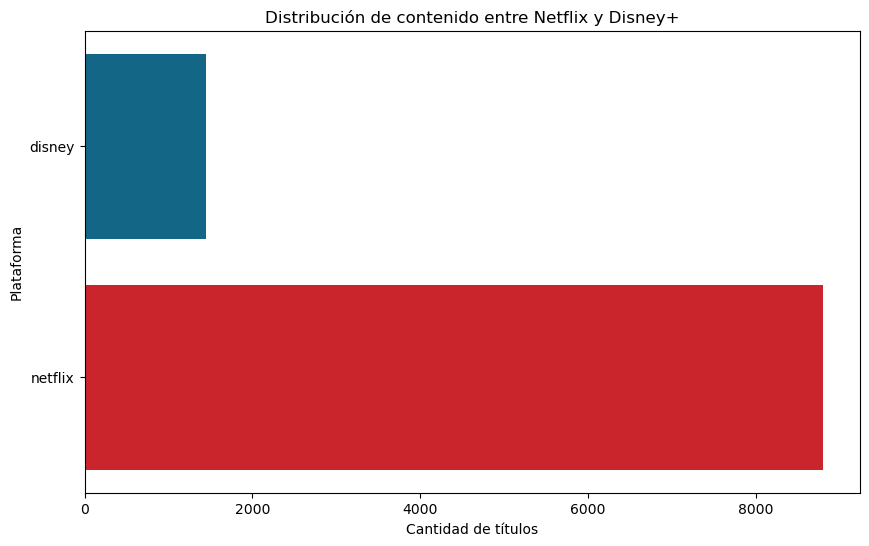

In [70]:
palette = {'netflix': '#E50914', 'disney': '#006e99'}
# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='plataforma', palette=palette)
plt.title('Distribución de contenido entre Netflix y Disney+')
plt.xlabel('Cantidad de títulos')
plt.ylabel('Plataforma')
plt.show()

Gráfica de los contenidos por franja de edad que hay en cada plataforma:

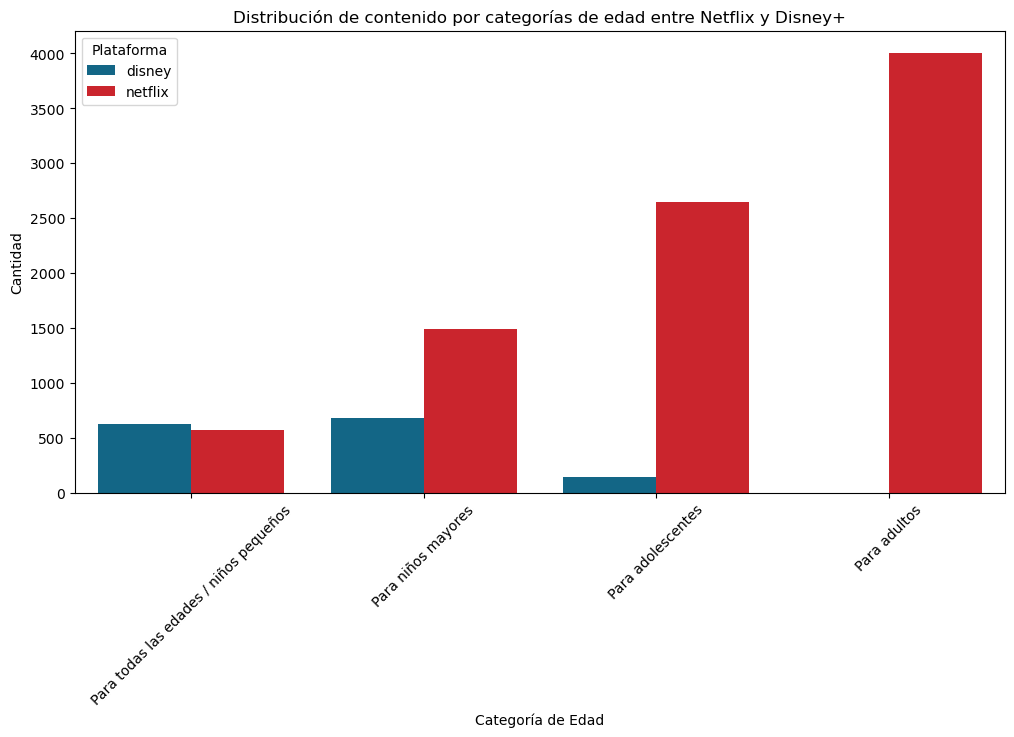

In [71]:
# Excluimos desconocido sin eliminar esos contenidos del dataframe
df_filtered = df[df['age_category'] != 'Desconocido']

# Definir paleta de colores específica
palette = {'netflix': '#E50914', 'disney': '#006e99'}

# Crear el gráfico con los datos filtrados
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='age_category', hue='plataforma', palette=palette)
plt.title('Distribución de contenido por categorías de edad entre Netflix y Disney+')
plt.xlabel('Categoría de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(title='Plataforma')
plt.show()

Gráfica para ver la distribución de los contenidos por franjas de edad en detalle en cada plataforma:

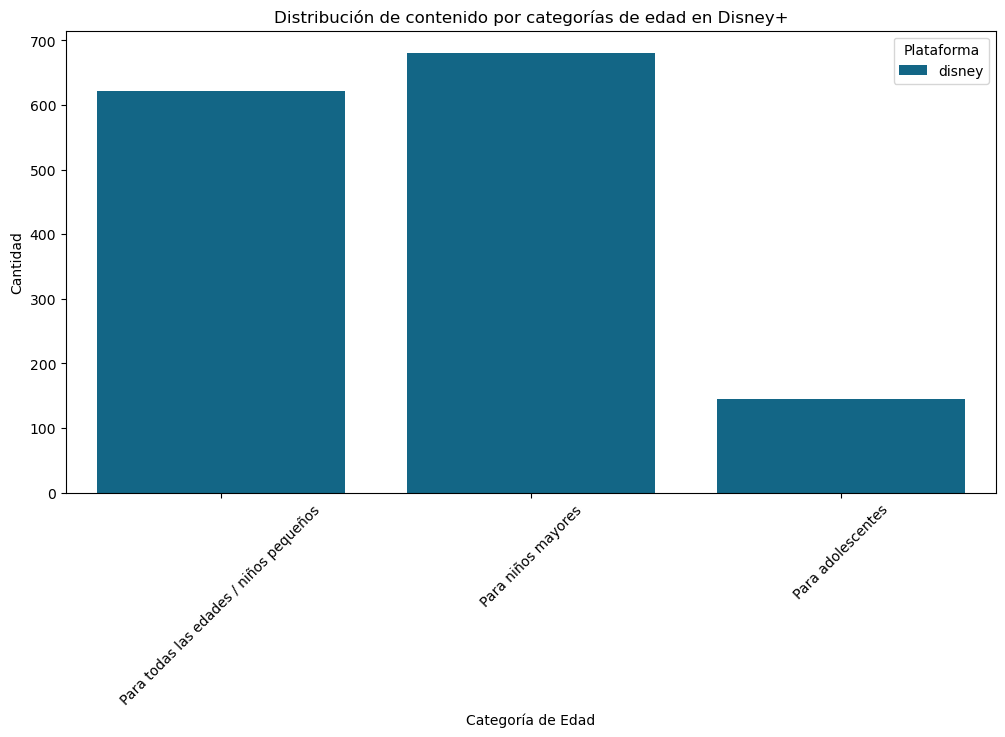

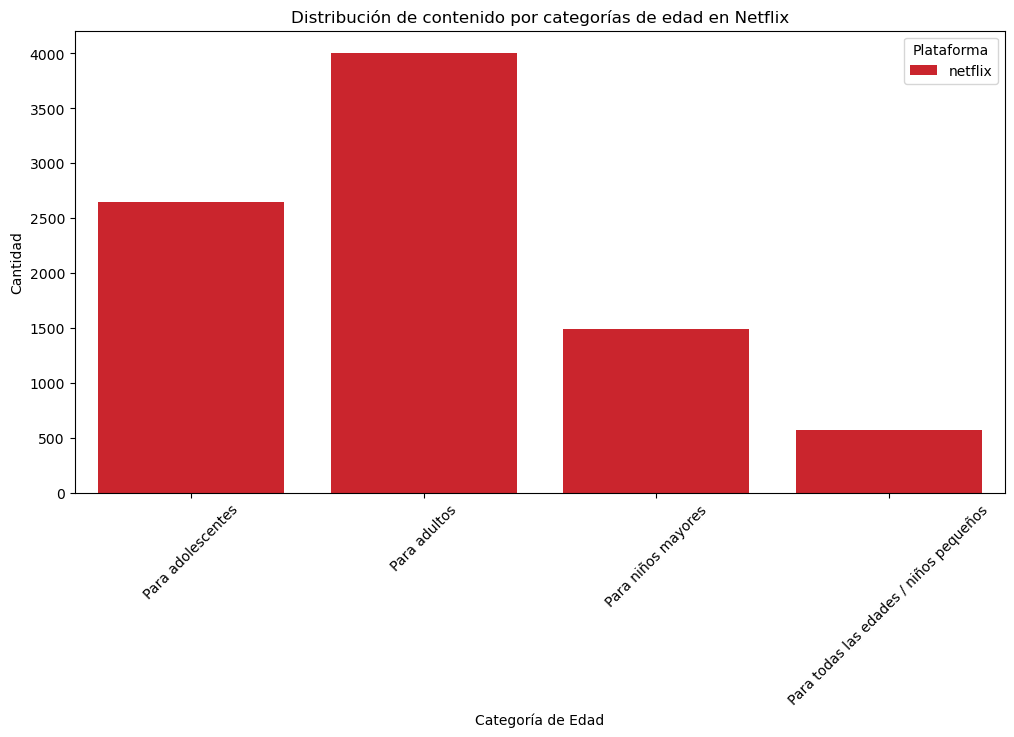

In [72]:
df_disney = df_filtered[df_filtered['plataforma'] == 'disney']

plt.figure(figsize=(12, 6))
sns.countplot(data=df_disney, x='age_category', hue='plataforma', palette=palette)
plt.title('Distribución de contenido por categorías de edad en Disney+')
plt.xlabel('Categoría de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(title='Plataforma')
plt.show()

df_netflix = df_filtered[df_filtered['plataforma'] == 'netflix']

plt.figure(figsize=(12, 6))
sns.countplot(data=df_netflix, x='age_category', hue='plataforma', palette=palette)
plt.title('Distribución de contenido por categorías de edad en Netflix')
plt.xlabel('Categoría de Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend(title='Plataforma')
plt.show()

Gráfica para ver la cantidad de películas y series que hay en cada plataforma:

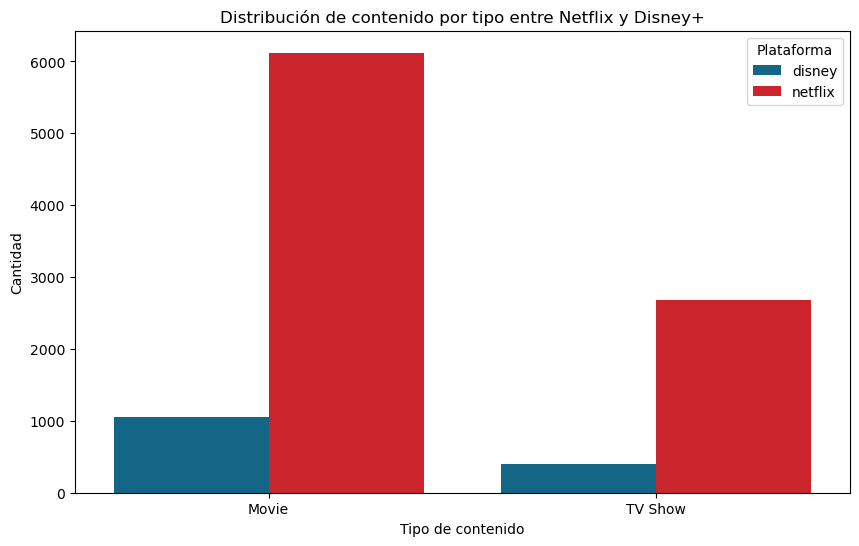

In [73]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', hue='plataforma', palette=palette)
plt.title('Distribución de contenido por tipo entre Netflix y Disney+')
plt.xlabel('Tipo de contenido')
plt.ylabel('Cantidad')
plt.legend(title='Plataforma')
plt.show()

Gráfica para ver la distribución de títulos según su año de realización en cada plataforma:

In [74]:
# Obtener el año actual
current_year = 2023

# Filtrar los datos para incluir solo los años desde 1998 hasta el actual
df_last_25_years = df[df['release_year'] >= (current_year - 25)]

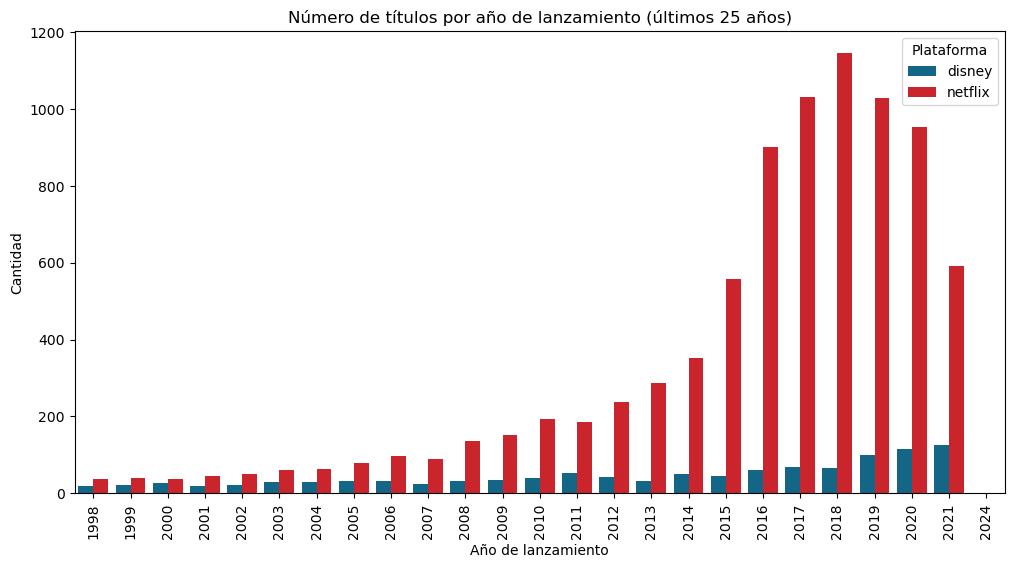

In [75]:
# Definir paleta de colores específica

palette = {'netflix': '#E50914', 'disney': '#006e99'}

plt.figure(figsize=(12, 6))
sns.countplot(data=df_last_25_years, x='release_year', hue='plataforma', palette=palette)
plt.title('Número de títulos por año de lanzamiento (últimos 25 años)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Plataforma')
plt.show()

Gráficos para ver en detalle la distribución por años de los títulos de Disney+en detalle:

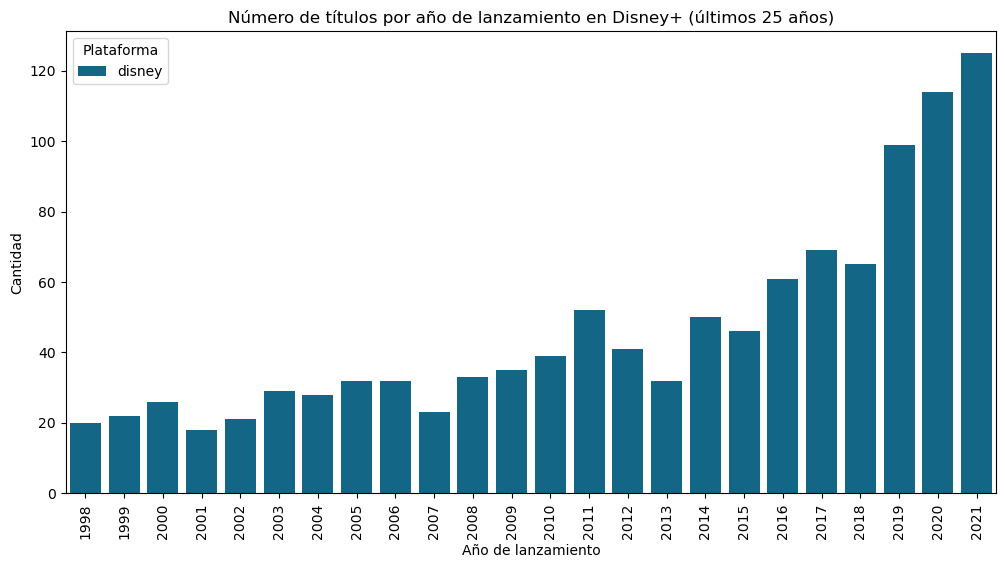

In [76]:
df_disney = df_last_25_years[df_last_25_years['plataforma'] == 'disney']

plt.figure(figsize=(12, 6))
sns.countplot(data=df_disney, x='release_year', hue='plataforma', palette= palette)
plt.title('Número de títulos por año de lanzamiento en Disney+ (últimos 25 años)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.legend(title='Plataforma')
plt.show()

Gráfica para ver la distribución de títulos por calificación de públicos:

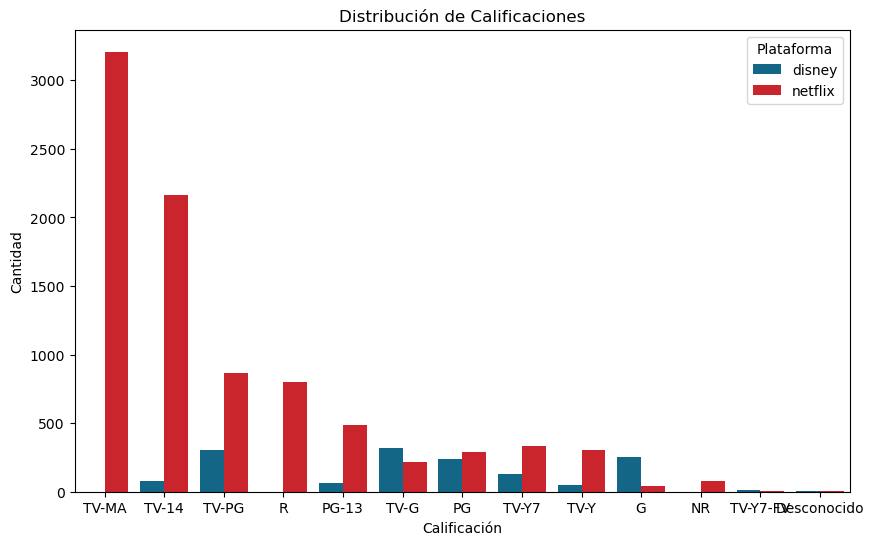

In [77]:
# Distribución de Calificaciones
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='plataforma', palette=palette, order=df['rating'].value_counts().index)
plt.title('Distribución de Calificaciones')
plt.xlabel('Calificación')
plt.ylabel('Cantidad')
plt.legend(title='Plataforma')
plt.show()

Extraer de la columna 'listed_in', en la que se enumeran los géneros donde se clasifica la película, los valores para una nueva columna 'genres' que sí que podremos analizar.

In [78]:
# Separar los géneros en la columna 'listed_in' por comas
df['genres'] = df['listed_in'].str.split(',')
# Explode la columna de géneros para tener una fila por cada género
df_exploded = df.explode('genres')
#Quitamos los espacios y las minúsculas
df_exploded['genres'] = df_exploded['genres'].str.strip().str.lower()
df_exploded['genres'].unique()


array(['animation', 'family', 'comedy', 'musical', 'docuseries',
       'historical', 'music', 'biographical', 'documentary',
       'action-adventure', 'superhero', 'reality', 'survival',
       'animals & nature', 'kids', 'coming of age', 'drama', 'fantasy',
       'lifestyle', 'movies', 'science fiction', 'concert film', 'crime',
       'sports', 'anthology', 'medical', 'variety', 'spy/espionage',
       'buddy', 'parody', 'game show / competition', 'romance', 'anime',
       'romantic comedy', 'thriller', 'police/cop', 'talk show',
       'western', 'dance', 'series', 'mystery', 'soap opera / melodrama',
       'disaster', 'travel', 'documentaries', 'international tv shows',
       'tv dramas', 'tv mysteries', 'crime tv shows',
       'tv action & adventure', 'reality tv', 'romantic tv shows',
       'tv comedies', 'tv horror', 'children & family movies', 'dramas',
       'independent movies', 'international movies', 'british tv shows',
       'comedies', 'spanish-language tv shows

Hacemos un mapeo para standarizar y unificar los géneros.

In [80]:
genre_mapping = {
    'comedy': 'Comedies', 'comedies': 'Comedies', 'romantic comedy': 'Comedies',
    'tv comedies': 'Comedies', 'parody': 'Comedies', 'stand-up comedy': 'Comedies',

    'drama': 'Dramas', 'dramas': 'Dramas', 'tv dramas': 'Dramas',
    'coming of age': 'Dramas', 'medical': 'Dramas', 'soap opera / melodrama': 'Dramas',
    'teen tv shows': 'Dramas',

    'documentary': 'Documentaries', 'docuseries': 'Documentaries', 'documentaries': 'Documentaries',
    'science & nature tv': 'Documentaries',

    'animation': 'Animation', 'anime': 'Animation', 'anime features': 'Animation',
    'anime series': 'Animation',

    'action-adventure': 'Action & Adventure', 'action & adventure': 'Action & Adventure',
    'tv action & adventure': 'Action & Adventure', 'action': 'Action & Adventure',
    'superhero': 'Action & Adventure', 'spy/espionage': 'Action & Adventure',

    'thriller': 'Thrillers', 'tv thrillers': 'Thrillers', 'crime': 'Thrillers', 
    'crime tv shows': 'Thrillers', 'police/cop': 'Thrillers',

    'science fiction': 'Science Fiction & Fantasy', 'sci-fi & fantasy': 'Science Fiction & Fantasy',
    'tv sci-fi & fantasy': 'Science Fiction & Fantasy', 'fantasy': 'Science Fiction & Fantasy',
    'sci-fi': 'Science Fiction & Fantasy',

    'horror': 'Horror', 'horror movies': 'Horror', 'tv horror': 'Horror',

    'kids': 'Kids & Family', "kids' tv": 'Kids & Family', 'children & family movies': 'Kids & Family',

    'romance': 'Romance', 'romantic movies': 'Romance', 'romantic tv shows': 'Romance',

    'international tv shows': 'International TV Shows', 'spanish-language tv shows': 'International TV Shows',
    'korean tv shows': 'International TV Shows', 'british tv shows': 'International TV Shows',

    'classic movies': 'Classics & Cult', 'cult movies': 'Classics & Cult',
    'classic & cult tv': 'Classics & Cult',

    'music': 'Music & Musicals', 'musical': 'Music & Musicals', 'concert film': 'Music & Musicals', 
    'music & musicals': 'Music & Musicals',

    'reality': 'Reality & Variety', 'reality tv': 'Reality & Variety', 
    'game show / competition': 'Reality & Variety', 'talk show': 'Reality & Variety', 
    'variety': 'Reality & Variety'
}

# Aplicamos el mapeado
df_exploded['genres'] = df_exploded['genres'].map(genre_mapping)

# Eliminar los valores nulos después de mapear
df_exploded = df_exploded.dropna(subset=['genres'])

df_exploded['genres'].unique()


array(['Animation', 'Comedies', 'Music & Musicals', 'Documentaries',
       'Action & Adventure', 'Reality & Variety', 'Kids & Family',
       'Dramas', 'Science Fiction & Fantasy', 'Thrillers', 'Romance',
       'International TV Shows', 'Horror', 'Classics & Cult'],
      dtype=object)

Gráfico para ver los contenidos por géneros que hay en cada plataforma:

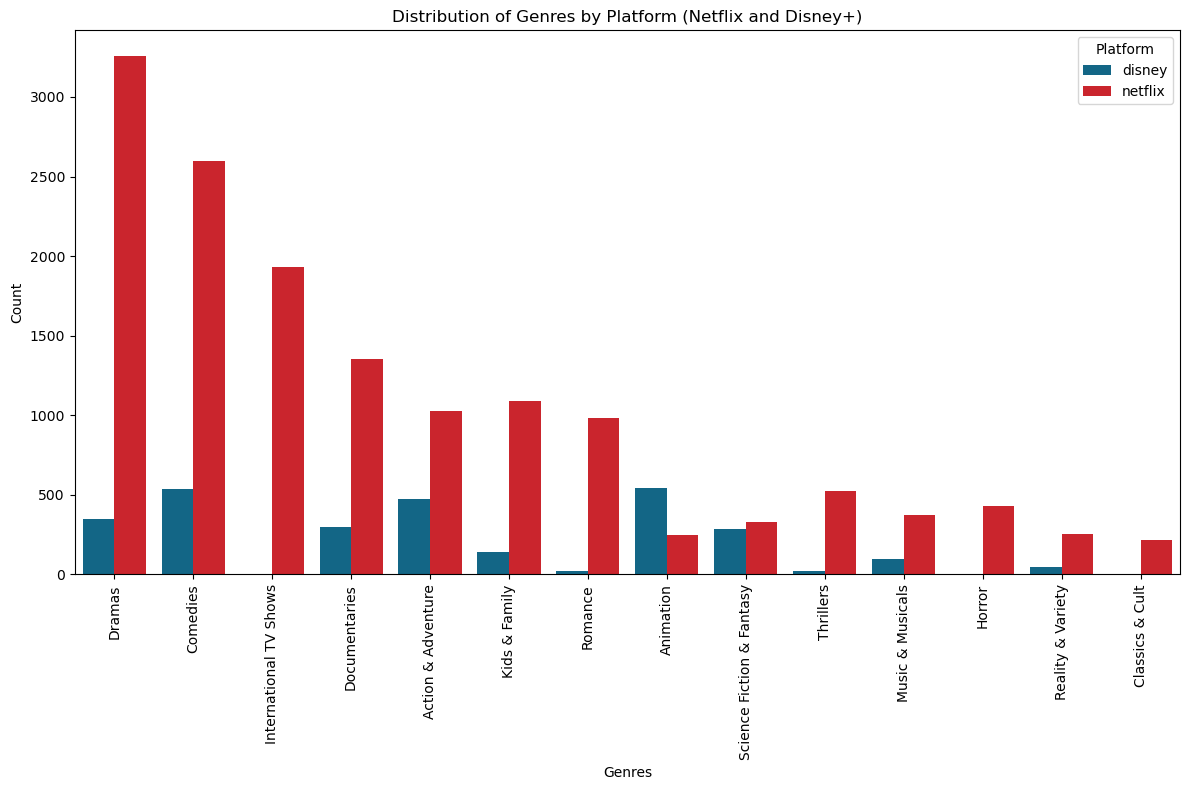

In [81]:
palette = {'netflix': '#E50914', 'disney': '#006e99'}
# Crear un gráfico que cuente los géneros en cada plataforma
plt.figure(figsize=(12, 8))
sns.countplot(data=df_exploded, x='genres', hue='plataforma', palette=palette, order=df_exploded['genres'].value_counts().index)
plt.title('Distribution of Genres by Platform (Netflix and Disney+)')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

C:\Users\almuo\AppData\Local\Temp\ipykernel_16124\3694870442.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_netflix, x='genres', order=df_netflix['genres'].value_counts().index, palette=pastel_palette)
C:\Users\almuo\AppData\Local\Temp\ipykernel_16124\3694870442.py:10: UserWarning: 
The palette list has fewer values (6) than needed (14) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_netflix, x='genres', order=df_netflix['genres'].value_counts().index, palette=pastel_palette)


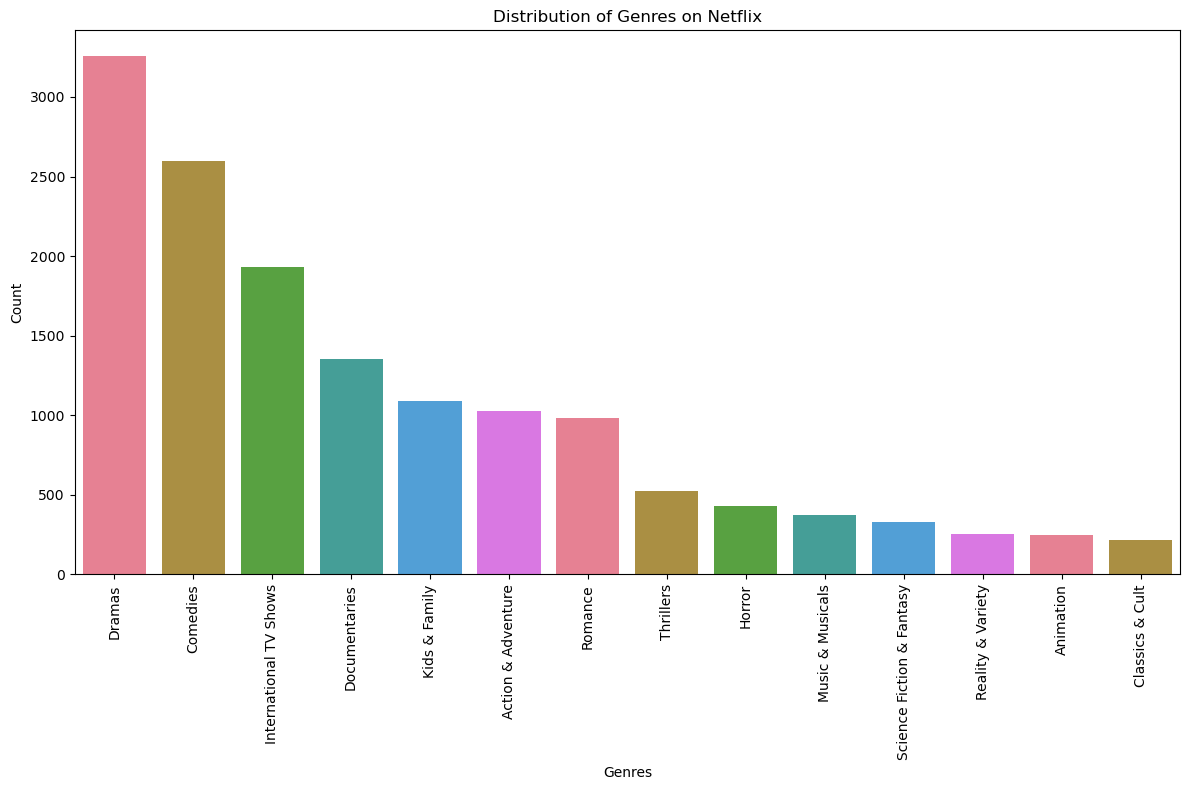

C:\Users\almuo\AppData\Local\Temp\ipykernel_16124\3694870442.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_disney, x='genres', order=df_disney['genres'].value_counts().index, palette=pastel_palette)
C:\Users\almuo\AppData\Local\Temp\ipykernel_16124\3694870442.py:20: UserWarning: 
The palette list has fewer values (6) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_disney, x='genres', order=df_disney['genres'].value_counts().index, palette=pastel_palette)


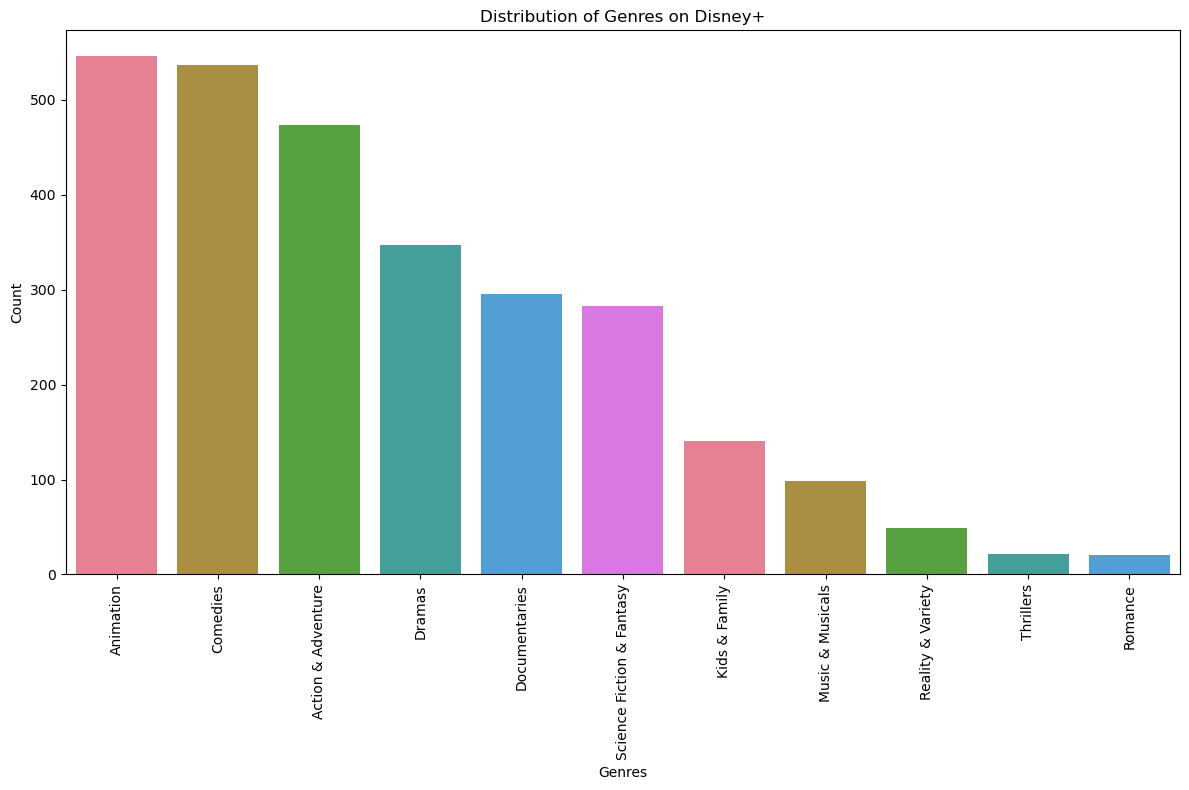

In [85]:
# Creamos gráficos para cada una de las plataformas
df_netflix = df_exploded[df_exploded['plataforma'] == 'netflix']
df_disney = df_exploded[df_exploded['plataforma'] == 'disney']

# Paleta de colores pastel tipo arcoíris
pastel_palette = sns.color_palette("husl")

# Gráfico para Netflix
plt.figure(figsize=(12, 8))
sns.countplot(data=df_netflix, x='genres', order=df_netflix['genres'].value_counts().index, palette=pastel_palette)
plt.title('Distribution of Genres on Netflix')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Gráfico para Disney+
plt.figure(figsize=(12, 8))
sns.countplot(data=df_disney, x='genres', order=df_disney['genres'].value_counts().index, palette=pastel_palette)
plt.title('Distribution of Genres on Disney+')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Web Scraping

In [1]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [13]:

import requests
from bs4 import BeautifulSoup
import time
import random

Hacemos una prueba con un título, para comprobar que funcione el código:

In [3]:
# Prueba del web scrapping
url = "https://www.rottentomatoes.com/tv/stranger_things"

# Hacemos la solicitud a la página
response = requests.get(url)

# Comprobamos que no da error
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Buscamos la calificación
    rating_element = soup.find('rt-text', {'size': '1.375', 'context': 'label'})
    
    # Si la encuentra, extraemos la califciación
    if rating_element:
        rating = rating_element.get_text(strip=True)
        print(f"Calificación de Stranger Things: {rating}")
    else:
        print("No se encontró la calificación en la página.")
else:
    print(f"Error al acceder a la página: {response.status_code}")

Calificación de Stranger Things: 91%


Definición de la función de web scraping en series: 

In [64]:
def get_rotten_tomatoes_rating(title):
    # Ponemos encabezados para imitar un navegador web
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

    # Incluimos el titulo en la url de la página
    query = title.replace(' ', '_').lower()
    query = query.replace(':', '')
    url = f"https://www.rottentomatoes.com/tv/{query}"

    try:
        # Hacemos la solicitud a la página
        response = requests.get(url, headers=headers, timeout=10)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Buscamos el elemento que contiene la calificación
            rating_element = soup.find('rt-text', {'size': '1.375', 'context': 'label'})

            # Si lo encontramos, la extraemos
            if rating_element:
                rating = rating_element.get_text(strip=True)
                return rating
            else:
                return "No se encontró calificación"
        else:
            return f"Error {response.status_code}"

    except Exception as e:
        return f"Error al obtener datos: {str(e)}"

Aplicación de la función en series (salen: errores 404 porque Rotten Tomatoes está especializado en películas y no aparecen muchas de las series o programas de TV en su web; y valores vacíos cuando no hay calificación)

In [35]:
df_tv = df[df['type']== 'TV Show']


# Creamos una lista para almacenar los resultados
ratings = []

titles = df_tv['title']

# Función para aplicar la búsqueda a cada título en nuestro DataFrame
for title in titles:
    print(f"Obteniendo calificación para: {title}")
    rating = get_rotten_tomatoes_rating(title)
    ratings.append({'title': title, 'rating': rating})
    
    # Esperar segundos entre solicitudes
    time.sleep(2)

# Crear un nuevo dataframe con los resultados
ratings_df = pd.DataFrame(ratings)

# Guardar los resultados en un archivo CSV o Excel si lo prefieres
ratings_df.to_csv('rotten_tomatoes_ratings.csv', index=False)

# Mostrar el dataframe
print(ratings_df)


Obteniendo calificación para: The Beatles: Get Back
Obteniendo calificación para: Hawkeye
Obteniendo calificación para: Port Protection Alaska
Obteniendo calificación para: Secrets of the Zoo: Tampa
Obteniendo calificación para: Dr. Oakley, Yukon Vet
Obteniendo calificación para: Disney Fancy Nancy
Obteniendo calificación para: Disney Intertwined
Obteniendo calificación para: Olaf Presents
Obteniendo calificación para: Disney Amphibia
Obteniendo calificación para: Photo Ark
Obteniendo calificación para: Storm Rising
Obteniendo calificación para: PJ Masks
Obteniendo calificación para: The Wild Life of Dr. Ole
Obteniendo calificación para: Apollo: Back To The Moon
Obteniendo calificación para: Just Beyond
Obteniendo calificación para: Secrets Of The Zoo: Down Under
Obteniendo calificación para: Secrets of the Zoo: North Carolina
Obteniendo calificación para: The Wizard of Paws
Obteniendo calificación para: Zombies: Addison's Moonstone Mystery
Obteniendo calificación para: Among the Stars

Definimos la función para películas. Es diferente porque en las películas las url varían mucho y no vale con introducir el título, primero se debe buscar la película para que nos devuelva su url.

In [16]:
df_mov = df[df['type']== 'Movie']

In [17]:
# Crea una lista de user agents y proxies para intentar evitar el bloqueo
user_agents = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'
]
proxies = [
    'http://133.18.234.13:80',
    'http://102.68.128.217:8080',
    'http://130.61.171.71:80',
]

def get_movies_rating(title):
    headers = {'User-Agent': random.choice(user_agents)}
    search_url = f"https://www.rottentomatoes.com/search?search={title.replace(' ', '%20')}"
    proxy = {'http': random.choice(proxies)}

    try:
        # Hacemos la solicitud a la página de búsqueda de la película
        search_response = requests.get(search_url, headers=headers, proxies=proxy, timeout=20)
        
        if search_response.status_code != 200:
            return f"Error {search_response.status_code} en la búsqueda"
        
        #Si funciona le pedimos que escoja el primer resultado de la búsqueda
        search_soup = BeautifulSoup(search_response.text, 'html.parser')

        first_result = search_soup.find('search-page-media-row')
        
        if not first_result:
            return "No se encontró la película en la búsqueda"

        # Conseguir la url de la película que nos salía primero al hacer la búsqueda
        movie_url = first_result.find('a')['href']
        full_movie_url = f"https://www.rottentomatoes.com{movie_url}"

        # Hacemos la solicitud a la página de la película
        movie_response = requests.get(full_movie_url, headers=headers, timeout=20)

        if movie_response.status_code != 200:
            return f"Error {movie_response.status_code} al obtener la página de la película"

        # Buscar el elemento donde está la puntuación
        movie_soup = BeautifulSoup(movie_response.text, 'html.parser')
        rating_element = movie_soup.find('score-board')

        if rating_element and 'tomatometerscore' in rating_element.attrs:
            # Devolver la puntuación de la película
            return rating_element['tomatometerscore'].strip()
        else:
            # Si no tiene puntuación de expertos, nos quedamos con la del público
            alternative_rating_element = movie_soup.find('rt-text', {'context': 'label'})
            if alternative_rating_element:
                return alternative_rating_element.text.strip()
            else:
                return "No se encontró calificación"
    #Si falla la primera solicitud devolvemos el error
    except Exception as e:
        return f"Error al obtener datos: {str(e)}"


Aplicamos la función a todas las películas de la columna 'title':

In [18]:
# Lista para almacenar los resultados
ratings = []

# Seleccionamos los primeros 100 títulos del DataFrame
titles = df_mov['title'].iloc[0:100]

# Aplicamos la búsqueda a cada título en el DataFrame
for title in titles:
    print(f"Obteniendo calificación para: {title}")
    rating = get_movies_rating(title)
    ratings.append({'title': title, 'rating': rating})
    
    # Esperar entre solicitudes (2-5 segundos)
    time.sleep(random.uniform(2, 5))

# Crear un nuevo DataFrame con los resultados
ratings_df = pd.DataFrame(ratings)

# Guardar los resultados en un archivo CSV
ratings_df.to_csv('rotten_tomatoes_mov_ratings.csv', index=False)

# Mostrar el DataFrame
print(ratings_df)

Obteniendo calificación para: Duck the Halls: A Mickey Mouse Christmas Special
Obteniendo calificación para: Ernest Saves Christmas
Obteniendo calificación para: Ice Age: A Mammoth Christmas
Obteniendo calificación para: The Queen Family Singalong
Obteniendo calificación para: Becoming Cousteau
Obteniendo calificación para: A Muppets Christmas: Letters To Santa
Obteniendo calificación para: Adventure Thru the Walt Disney Archives
Obteniendo calificación para: Puppy for Hanukkah
Obteniendo calificación para: The Pixar Story
Obteniendo calificación para: America the Beautiful
Obteniendo calificación para: Baymax!
Obteniendo calificación para: Ciao Alberto
Obteniendo calificación para: Enchanted
Obteniendo calificación para: Feast
Obteniendo calificación para: Frozen Fever
Obteniendo calificación para: Get a Horse!
Obteniendo calificación para: Home Sweet Home Alone
Obteniendo calificación para: Jungle Cruise
Obteniendo calificación para: Limitless with Chris Hemsworth
Obteniendo califica

Nos devuelve todo con el error que significa que nos ha bloqueado la página por hacer web scraping.

In [59]:
ratings_df

,title,rating
0,Duck the Halls: A Mickey Mouse Christmas Special,Error al obtener datos: HTTPSConnectionPool(ho...
1,Ernest Saves Christmas,Error al obtener datos: HTTPSConnectionPool(ho...
2,Ice Age: A Mammoth Christmas,Error al obtener datos: HTTPSConnectionPool(ho...
3,The Queen Family Singalong,Error al obtener datos: HTTPSConnectionPool(ho...
4,The Beatles: Get Back,Error al obtener datos: HTTPSConnectionPool(ho...
...,...,...
95,The Fault in Our Stars,Error al obtener datos: HTTPSConnectionPool(ho...
96,Dog: Impossible,Error al obtener datos: HTTPSConnectionPool(ho...
97,Spidey And His Amazing Friends,Error al obtener datos: HTTPSConnectionPool(ho...
98,Star Wars: Visions,Error al obtener datos: HTTPSConnectionPool(ho...


## Ratings data

In [86]:
import pandas as pd

# Ruta del archivo movies ratings con valores de puntuación (el que se encuentra en el repositorio está lleno de errores)
file_path_ratings = r"C:\Users\almuo\Desktop\IRONHACK\Project 1 Disney vs Netflix\rotten_tomatoes_mov_ratings.csv"

# Intentar leer el archivo CSV de ratingss usando diferentes codificaciones
try:
    ratings_df = pd.read_csv(file_path_ratings, encoding='latin1')
    print("Ratings data imported successfully with encoding 'latin1'.")
except UnicodeDecodeError:
    try:
        ratings_df = pd.read_csv(file_path_ratings, encoding='iso-8859-1')
        print("Ratings data imported successfully with encoding 'iso-8859-1'.")
    except UnicodeDecodeError:
        ratings_df = pd.read_csv(file_path_ratings, encoding='cp1252')
        print("Ratings data imported successfully with encoding 'cp1252'.")

# Muestra las primeras filas del DataFrame para verificar que se ha importado correctamente
ratings_df['score'] = ratings_df['score'].str.replace(',', '.', regex=False)
ratings_df['score'] = pd.to_numeric(ratings_df['score'])
print(ratings_df.head())


Ratings data imported successfully with encoding 'latin1'.
                               title  score
0                      Black Panther   87.5
1                  Avengers: Endgame   92.0
2     Mission: Impossible -- Fallout   92.5
3                 Mad Max: Fury Road   91.5
4  Spider-Man: Into the Spider-Verse   95.0


In [92]:
# Ruta del archivo tv shows ratings
file_path_ratings2 = 'rotten_tomatoes_ratings.csv'

# Intentar leer el archivo CSV de ratingss usando diferentes codificaciones
try:
    ratings_df2 = pd.read_csv(file_path_ratings2, encoding='latin1')
    print("Ratings data imported successfully with encoding 'latin1'.")
except UnicodeDecodeError:
    try:
        ratings_df2 = pd.read_csv(file_path_ratings2, encoding='iso-8859-1')
        print("Ratings data imported successfully with encoding 'iso-8859-1'.")
    except UnicodeDecodeError:
        ratings_df2 = pd.read_csv(file_path_ratings2, encoding='cp1252')
        print("Ratings data imported successfully with encoding 'cp1252'.")

# Muestra las primeras filas del DataFrame para verificar que se ha importado correctamente
ratings_df2.rename(columns={'rating': 'score'}, inplace=True)
# Eliminar filas con valores vacíos (NaN)
ratings_df2.dropna(inplace=True)
# Eliminar filas donde el valor sea 'Error 404'
ratings_df2 = ratings_df2[ratings_df2 != 'Error 404'].dropna()
ratings_df2 = ratings_df2[ratings_df2 != 'Error 500'].dropna()
# Convertir al tipo de dato correcto
ratings_df2['score'] = ratings_df2['score'].str.replace('%', '', regex=False)
ratings_df2['score'] = pd.to_numeric(ratings_df2['score'])
# Muestra las primeras filas del DataFrame para verificar que se ha importado correctamente
print(ratings_df2.head())

Ratings data imported successfully with encoding 'latin1'.
                    title  score
0   The Beatles: Get Back     93
1                 Hawkeye     92
7           Olaf Presents    100
14            Just Beyond     88
31           The Simpsons     85


In [93]:
all_ratings_df = pd.concat([ratings_df, ratings_df2], ignore_index=True)


In [102]:
complete_df = pd.merge(df_exploded, all_ratings_df, on='title', how='inner')
complete_df.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,listed_in,description,plataforma,age_category,genres,score
0,s5,TV Show,The Beatles: Get Back,Desconocido,"John Lennon, Paul McCartney, George Harrison, ...",2021-11-25,2021,Desconocido,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,disney,Desconocido,Documentaries,93.0
1,s5,TV Show,The Beatles: Get Back,Desconocido,"John Lennon, Paul McCartney, George Harrison, ...",2021-11-25,2021,Desconocido,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...,disney,Desconocido,Music & Musicals,93.0
2,s7,TV Show,Hawkeye,Desconocido,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",2021-11-24,2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...,disney,Para adolescentes,Action & Adventure,92.0
3,s7,TV Show,Hawkeye,Desconocido,"Jeremy Renner, Hailee Steinfeld, Vera Farmiga,...",2021-11-24,2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...,disney,Para adolescentes,Action & Adventure,92.0
4,s20,Movie,Enchanted,Kevin Lima,"Amy Adams, Patrick Dempsey, James Marsden, Tim...",2021-11-12,2007,PG,110 min,"Comedy, Family, Fantasy",An animated princess winds up in the real worl...,disney,Para niños mayores,Comedies,86.5


CALCULAMOS LA MEDIA Y DESVIACIÓN ESTANDAR

In [96]:
media_disney = complete_df[complete_df['plataforma'] == 'disney']['score'].mean()
desviacion_disney = complete_df[complete_df['plataforma'] == 'disney']['score'].std()

# Para Netflix
media_netflix = complete_df[complete_df['plataforma'] == 'netflix']['score'].mean()
desviacion_netflix = complete_df[complete_df['plataforma'] == 'netflix']['score'].std()

In [97]:
print(f"Media: {media_disney} y desviación estándar en Disney: {desviacion_disney}")

print(f"Media: {media_netflix} y desviación estándar en Netflix: {desviacion_netflix}")

Media: 86.67425968109339 y desviación estándar en Disney: 10.706591143503458
Media: 80.3416870415648 y desviación estándar en Netflix: 20.102482037386956


In [98]:
contenidos_para_ninos = complete_df[complete_df['age_category'] == 'Para todas las edades / niños pequeños']

media_disney_ninos = contenidos_para_ninos[contenidos_para_ninos['plataforma'] == 'disney']['score'].mean()

media_netflix_ninos = contenidos_para_ninos[contenidos_para_ninos['plataforma'] == 'netflix']['score'].mean()

print(f"Media para contenidos infantiles de Disney: {media_disney_ninos}")
print(f"Media de contenidos infantiles de Netflix: {media_netflix_ninos}")

Media para contenidos infantiles de Disney: 87.53103448275863
Media de contenidos infantiles de Netflix: 88.70588235294117


# Modelo  K-means

In [36]:
# Convertir 'date_added' a solo año y mes (si lo necesitas)
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [37]:
# Convertir 'duration' a minutos (si es posible, si está en horas/películas)
# Supongamos que las series están en formato "X Seasons" y películas en "X min"
df['duration_min'] = df['duration'].apply(lambda x: int(x.split()[0]) if 'min' in x else int(x.split()[0]) * 60)

In [38]:
# Codificar las columnas categóricas
label_cols = ['type', 'rating', 'age_category', 'genres']
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Convertir a str para evitar problemas con valores nulos
    label_encoders[col] = le

In [39]:
# Seleccionar columnas numéricas para K-means
X = df[['release_year', 'rating', 'duration_min', 'age_category', 'genres']]

In [40]:
# Estandarizar los datos (opcional pero recomendado)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [41]:
# 2. Aplicación del algoritmo K-means

# Definir número de clústeres (ejemplo k=4)
kmeans = KMeans(n_clusters=4, random_state=42)

# Ajustar K-means al conjunto de datos
df['cluster'] = kmeans.fit_predict(X_scaled)

# Ver los resultados del clustering
print(df[['title', 'cluster','genres']].head())

c:\Users\thaty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                              title  cluster  genres
0  Duck the Halls: A Mickey Mouse Christmas Special        2     221
1                            Ernest Saves Christmas        3     485
2                      Ice Age: A Mammoth Christmas        2     198
3                        The Queen Family Singalong        2     766
4                             The Beatles: Get Back        0     586


In [42]:
# 3. Analizar los resultados: podemos ver cuántos elementos hay en cada clúster
print(df['cluster'].value_counts())

cluster
0    5735
2    2621
3    1699
1     194
Name: count, dtype: int64


# Modelo k-means por plataformas

In [43]:
# Filtrar correctamente por los nombres de las plataformas
df_netflix = df[df['plataforma'] == 'netflix']
df_disney = df[df['plataforma'] == 'disney']

In [44]:
# Seleccionar las columnas relevantes para el clustering
features = ['release_year', 'rating', 'duration_min', 'age_category', 'genres', 'year_added', 'month_added']

In [45]:
# Estandarizar las variables numéricas
scaler = StandardScaler()

In [46]:
# Para Netflix
X_netflix = scaler.fit_transform(df_netflix[features])

In [47]:
# Para Disney
X_disney = scaler.fit_transform(df_disney[features])

In [48]:
# Eliminar filas con NaN en las columnas seleccionadas para clustering
df_netflix_clean = df_netflix.dropna(subset=features)
df_disney_clean = df_disney.dropna(subset=features)

# Estandarizar las variables numéricas
X_netflix = scaler.fit_transform(df_netflix_clean[features])
X_disney = scaler.fit_transform(df_disney_clean[features])

# Aplicar KMeans
kmeans_netflix = KMeans(n_clusters=3, random_state=42)
df_netflix_clean['cluster'] = kmeans_netflix.fit_predict(X_netflix)

kmeans_disney = KMeans(n_clusters=3, random_state=42)
df_disney_clean['cluster'] = kmeans_disney.fit_predict(X_disney)

c:\Users\thaty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thaty\AppData\Local\Temp\ipykernel_11928\2703517126.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_clean['cluster'] = kmeans_netflix.fit_predict(X_netflix)
c:\Users\thaty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\thaty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is kno

In [49]:
# Aplicar KMeans
kmeans_netflix = KMeans(n_clusters=3, random_state=42)
df_netflix_clean['cluster'] = kmeans_netflix.fit_predict(X_netflix)

kmeans_disney = KMeans(n_clusters=3, random_state=42)
df_disney_clean['cluster'] = kmeans_disney.fit_predict(X_disney)

c:\Users\thaty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thaty\AppData\Local\Temp\ipykernel_11928\1705860003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_netflix_clean['cluster'] = kmeans_netflix.fit_predict(X_netflix)
c:\Users\thaty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\thaty\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is know

In [50]:
# Mostramos los resultados
df_netflix_results = df_netflix[['plataforma', 'title', 'release_year', 'rating', 'cluster']].head()
df_disney_results = df_disney[['plataforma', 'title', 'release_year', 'rating', 'cluster']].head()